In [1]:
import os
import torchvision
from torch.utils.data.dataset import Dataset
from torch.utils.data.dataloader import DataLoader
from torchvision.transforms import transforms
from pathlib import Path
from PIL import Image
import torch
from collections import OrderedDict
import auxiliary
import model
from torch import nn
from d2l import torch as d2l
import random
from torchvision import models
import math
import matplotlib.pyplot as plt

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
train_data_dir = 'data/train/'
test_data_dir = 'data/test/'
validation_data_dir = 'data/validation/'
good_seed = 'GoodSeed/'
bad_seed = 'BadSeed/'

In [4]:
class MyDataset(Dataset):
    def __init__(self, good_seed_root, bad_seed_root, transform=None, is_label = False):
        self.transform = transforms.Compose([
            transforms.ToTensor()      
        ])
        self.transform = transforms.Compose([

            transforms.CenterCrop(190),
            transforms.Resize(224),
            transforms.RandomHorizontalFlip(),
            transforms.ColorJitter(brightness=0.2,
                                   contrast=0.5,
                                   saturation=0.4),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406],
                                             [0.229, 0.224, 0.225])])
        self.transform_label = torchvision.transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406],
                                             [0.229, 0.224, 0.225])])
        self.is_label = is_label
        good_seed_images_path = Path(good_seed_root)
        bad_seed_images_path = Path(bad_seed_root)
        images_list = list(good_seed_images_path.glob('*.png')) + list(bad_seed_images_path.glob('*.png'))
        images_list_str = [ str(x) for x in images_list ]
        self.images = images_list_str

    def __getitem__(self, item):
        image_path = self.images[item]
        image = Image.open(image_path) 
        if(self.is_label== False):
            image = self.transform(image) 
        if(self.is_label== True):
            image = self.transform_label(image) 
        label = 1 if 'good' in image_path.split('\\')[-1] else 0 
        return image, label

    def __len__(self):
        return len(self.images)

In [5]:
good_seed_train_data_file = Path(train_data_dir, good_seed)
bad_seed_train_data_file = Path(train_data_dir, bad_seed)
good_seed_valid_data_file = Path(validation_data_dir, good_seed)
bad_seed_valid_data_file = Path(validation_data_dir, bad_seed)

train_data = MyDataset(good_seed_train_data_file, bad_seed_train_data_file, is_label = False)
trainset = torch.utils.data.DataLoader(train_data, batch_size=128, shuffle=True)
valid_data = MyDataset(good_seed_valid_data_file, bad_seed_valid_data_file, is_label = True)
validset = torch.utils.data.DataLoader(valid_data, batch_size=128, shuffle=True)

[2023-07-30 22:50:58,553][auxiliary.py][line:120][INFO] Epoch:[60/60]	 train_loss=0.04530	 train_acc=0.962 vali_loss=0.10663	 vali_acc=0.958


train loss 0.045, valid loss 0.107, train accuracy :0.9620253164556962, valid accuracy :0.9575
374.4 examples/sec on [device(type='cuda', index=0)]


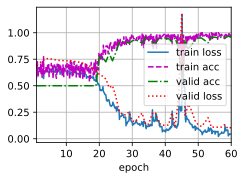

In [6]:
file_number = str(random.randint(100000000,999999999))
devices, num_epochs, lr, wd = d2l.try_all_gpus(), 60, 1e-4, 1e-4
file_number = file_number + '_lr' +str(lr) +'_epoch' + str(num_epochs) + '_Dino_Resnet50'
lr_period, lr_decay, net = 2, 1, model.get_Dino_net(devices)
auxiliary.train(net, trainset, validset, num_epochs, lr, wd, devices, lr_period, lr_decay, file_number)
model_path = 'models/trained_models/net_params_' + file_number + '.pth'
torch.save(net.state_dict(), model_path)

[2023-07-30 23:08:22,736][auxiliary.py][line:120][INFO] Epoch:[60/60]	 train_loss=0.09099	 train_acc=0.924 vali_loss=0.18777	 vali_acc=0.917


train loss 0.091, valid loss 0.188, train accuracy :0.9240506329113924, valid accuracy :0.9175
400.8 examples/sec on [device(type='cuda', index=0)]


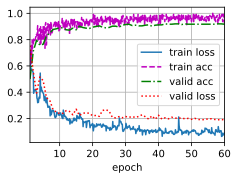

In [7]:
file_number = str(random.randint(100000000,999999999))
devices, num_epochs, lr, wd = d2l.try_all_gpus(), 60, 1e-4, 1e-4
file_number = file_number + '_lr' +str(lr) +'_epoch' + str(num_epochs) + '_Resnet50'
lr_period, lr_decay, net = 2, 0.9, model.get_ResNet_net(devices)
auxiliary.train(net, trainset, validset, num_epochs, lr, wd, devices, lr_period,
      lr_decay, file_number)
model_path = 'models/trained_models/net_params_' + file_number + '.pth'
torch.save(net.state_dict(), model_path)

[2023-07-30 23:30:06,522][auxiliary.py][line:120][INFO] Epoch:[40/40]	 train_loss=0.01055	 train_acc=1.000 vali_loss=0.06574	 vali_acc=0.980


train loss 0.011, valid loss 0.066, train accuracy :1.0, valid accuracy :0.98
90.0 examples/sec on [device(type='cuda', index=0)]


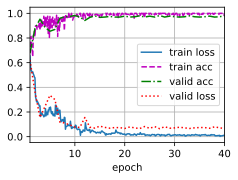

In [8]:
file_number = str(random.randint(100000000,999999999))
devices, num_epochs, lr, wd = d2l.try_all_gpus(), 40, 1e-4, 1e-4
file_number = file_number + '_lr' +str(lr) +'_epoch' + str(num_epochs) + '_Dino_vit'
lr_period, lr_decay, net = 2, 0.9, model.get_Dino_Vit_net(devices)
auxiliary.train(net, trainset, validset, num_epochs, lr, wd, devices, lr_period,
      lr_decay, file_number)
model_path = 'models/trained_models/net_params_' + file_number + '.pth'
torch.save(net.state_dict(), model_path)

[2023-07-30 23:40:29,781][auxiliary.py][line:120][INFO] Epoch:[40/40]	 train_loss=0.11279	 train_acc=0.962 vali_loss=0.20216	 vali_acc=0.922


train loss 0.113, valid loss 0.202, train accuracy :0.9620253164556962, valid accuracy :0.9225
798.1 examples/sec on [device(type='cuda', index=0)]


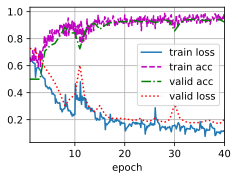

In [9]:
file_number = str(random.randint(100000000,999999999))
devices, num_epochs, lr, wd = d2l.try_all_gpus(), 40, 1e-4, 1e-4
file_number = file_number + '_lr' +str(lr) +'_epoch' + str(num_epochs) + '_vit'
lr_period, lr_decay, net = 2, 0.9, model.get_Vit_net(devices)
auxiliary.train(net, trainset, validset, num_epochs, lr, wd, devices, lr_period,
      lr_decay, file_number)
model_path = 'models/trained_models/net_params_' + file_number + '.pth'
torch.save(net.state_dict(), model_path)